# First-order derivative and slicing


## Introduction

For convenience, we start with importing some modules needed below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('../styles/mainstyle.use')

In this part of the course we describe how to compute numerically derivatives of functions such as,

```{math}
:label: eq:testfunc
f(x)=e^x \sin(3\pi x)
```

There are several conceptually different ways to do this. Following the same approach as for time integration, we can rely on Taylor's theorem to use the value of $f(x)$ at some neighboring points of $x$. This approach relies on what are known as finite differences. Another way to compute derivatives relies on decomposing the function $f(x)$ on a basis of functions $T_k(x)$ and computing the derivatives of $f(x)$ from the known derivatives of $T_k(x)$. This method is known as the spectral method and will be described later on in the course.

Let $x$ be the continuous variable defined in the interval $x\in[x_0,x_n]$. In any numerical problem, we have to limit the number of points at which we store the values of $f(x)$ because the random access memory (RAM) of our computers is limited. We therefore need to introduce an approximation of our continuous interval - the numerical grid. It is a set of grid points at which we evaluate all physical quantities.

For simplicity consider a uniform grid in which the $n+1$ grid points are evenly distributed. Therefore the coordinates of the grid points are:

```{math}
 x_i = i \Delta x, \; \; 0\leq i \leq n
```

with the endpoints of the grid located respectively at $x_0$ and $x_n$.

We will refer to the continuous variable defined in $[x_0,x_n]$ by $x$, and to its discrete representation by $x_i$. $x_i$ is called a *grid point* or sometimes a *grid node*. The value of some function $f(x)$ at the grid point $x_i$ is then denoted as $f_i$.

Using these notations, the approximation of a derivative through a finite-difference expression is generically given by:

```{math}
:label: eq:diffgeneric
f^{(k)}_i = \frac{1}{(\Delta x)^k}\sum_{j\in\mathcal{J}}c_j f_{i+j},
```

where $k$ represents the order of derivative, $\mathcal{J}$ is called the *stencil* - the group of points used to build the finite-difference approximation - and $c_j$ is the finite-difference coefficient defined at the stencil point of index $j$.

## First-order derivative

As an example of how the finite-difference approximation for a derivative of a given order can be derived, let us consider the first-order derivative of $f(x)$. According to Taylor's theorem, we can approximate $f(x+\Delta x)$ as follows:

```{math}
:label: TaylorSer
f(x+\Delta x)= f(x)+f'(x)\Delta x+O(\Delta x^2).
```

Expression {eq}`TaylorSer` is exact and allows us to get the following expression for the first-order derivative of $f$ at point $x$:

```{math}
:label: eq:forwardTaylorDiff1
f'(x) = \frac{f(x+\Delta x) - f(x)}{\Delta x}+O(\Delta x)
```

This expression is the usual right derivative of $f(x)$.

To approximate {eq}`eq:forwardTaylorDiff1` on the grid $x_0, x_1,\dots, x_i,\dots x_{n-1}, x_n$, we define the following first-order accurate approximation of $f'$ at $x_i$:

```{math}
:label: eq:forwardNodal
f^{' \rm f}_i = \frac{f_{i+1} - f_i}{\Delta x},\;\; \hbox{forward finite difference}.
```

The stencil for this expression is given by the sequence `[0, 1]`, where `0` stands for the point at which the derivative is evaluated, and the corresponding finite-difference coefficients are `[-1, 1]` (see {eq}`eq:diffgeneric`).

In the following figure we illustrate the stencil and mark in red the points involved in the computation:

<img width="600px" src="../figures/forwardDiff1.png">

Above the stencil, we display the quantity computed, and below the stencil we display the quantities involved in its computations.

It is important to highlight that the *enumeration of a stencil has nothing to do with the enumeration of the grid points*. The enumeration of grid points usually starts at one of the grid boundaries ($x_0$ in our cases) and ends at another boundary. The enumeration of a stencil is characteristic of each particular approximation. The stencil point labeled $0$ corresponds to the grid point at which the derivative is being approximated. The stencil indices then decrease to the left of this point and increase to its right. This is why in the above example the stencil is `[0, 1]`.

In the above stencil, we use two grid points - $x_i$ and $x_{i+1}$ - to obtain a first-order accurate expression for the first-order derivative at $x_i$. It is obvious that the forward finite difference formula {eq}`eq:forwardNodal` cannot be used at the right boundary node $x_n$. In section [One-sided finite differences](#One-sided-finite-differences), we discuss how the boundary nodes can be handled when the derivatives are being evaluated using finite differences.

Let us now define the backward finite-differences scheme in an identical manner. As Taylor's theorem is valid for $x$ in the interval $a < x-\Delta x \le x \le x+\Delta x < b$, we can approximate $f(x-\Delta x)$ as follows:

```{math}
f(x-\Delta x) \approx f(x) - f'(x)\Delta x. 
```

We can then define the first-order accurate backward finite-differences formula for the first-order derivative of $f(x)$ at $x_i$ as:

```{math}
:label: eq:backwardNodal
f^{'\rm b}_i = \frac{f_i - f_{i-1}}{\Delta x}, \;\; \hbox{backward finite difference}. 
```

It is based on the right derivative $f'(x)$. Highlighting in red the stencil points used to build expression {eq}`eq:backwardNodal`, we have:

<img width="600px" src="../figures/backwardDiff1.png">

As the forward finite-difference approximation cannot be used at the right boundary node $x_n$, the backward finite-difference approximation cannot be used at the left boundary node $x_0$. We also note that $f^{'\rm b}_{i+1} = f^{'\rm f}_i$.

Let us now derive a higher-order accurate approximation for $f'(x)$. Resorting again to Taylor's theorem we write:

```{math}
& f(x+\Delta x) \approx f(x)+f'(x)\Delta x+\frac12 f''(x)\Delta x^2 \\
& f(x-\Delta x) \approx f(x)-f'(x)\Delta x+\frac12 f''(x)\Delta x^2.
```

We substract equations both equations and get:

```{math}
:label: eq:centeredTaylorDiff
f'(x) = \frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x}+O(\Delta x^2),
```

which leads us to the second-order accurate approximation of $f'(x)$ at $x_i$:

```{math}
:label: eq:centeredDiff
f^{' \rm c}_i = \frac{f_{i+1} - f_{i-1}}{2\Delta x},\;\; \hbox{centered finite difference}.
```

This expression is called the centered finite difference first-order derivative and its stencil looks like this:

<img width="600px" src="../figures/centeredDiff1.png">

Using just two grid points, it's not possible to achieve an accuracy of higher order than $2$. The centered finite-difference scheme cannot be used both at the left or right boundary nodes of the grid.

Let us check that our formulas are correct. We first create a fine grid to accurately represent the function {eq}`eq:testfunc` and its derivative in the interval $x\in [0, \pi]$.

In [2]:
pi = np.pi       # 3.14...
nx = 200         # number of grid points (fine grid)
lx = pi          # length of the interval
dx = lx / (nx-1) # grid spacing

In [3]:
x = np.linspace(0, lx, nx)   # coordinates in the fine grid
f = np.exp(x)*np.sin(3*pi*x) # function in the fine grid

# Let us build a numpy array for the exact repre-
# sentation of the first-order derivative of f(x).
dfdx = np.exp(x)*(np.sin(3*pi*x) + 3*pi*np.cos(3*pi*x))

We have built a numpy array for the exact expression of the first-order derivative of $f(x)$. But what if we worked with a complicated function or required expressions for higher-order derivatives? It is useful to keep in mind that there is Python package just for that - for symbolic computations - [SymPy][20]. We won't get into details and leave it to you to explore SymPy. Note that SymPy is not part of the basic distribution of Anaconda, you would have to install it. 

Sympy supports [basic symbolic calculus][21], and provides [tools][22] to transform symbolic data to numerical representation. 

[20]: <https://docs.sympy.org/latest/index.html> "SymPy"
[21]: <https://docs.sympy.org/latest/tutorial/calculus.html> "Basic calculus"
[22]: <https://docs.sympy.org/latest/modules/utilities/lambdify.html?highlight=lambdify> "From symbolic to numerical data"

To experiment with our finite-difference approximations, we build a coarse grid with $80$ points, and evaluate the derivative:

In [4]:
# We don't care about overwriting grid variables,
# as we are not using them further than for con-
# struction of x and f(x) arrays.
nx = 80          # number of grid points (coarse grid)
lx = pi          # length of interval
dx = lx / (nx-1) # grid spacing

In [5]:
x_c = np.linspace(0, lx, nx)       # coordinates of the coarse grid points
f_c = np.exp(x_c)*np.sin(3*pi*x_c) # function on the coarse grid

# We create containers for the forward, backward
# and centered finite difference points.
df_forward = np.empty(nx)
df_backward = np.empty(nx)
df_centered = np.empty(nx)

# We fill arrays in the Python loops, so that
# you can explicitely see what grid nodes have
# been taken into account.
for i in range(0, nx-1): # last grid point is omitted
    df_forward[i] = (f_c[i+1] - f_c[i]) / dx
    
for i in range(1, nx): # first grid point is omitted
    df_backward[i] = (f_c[i] - f_c[i-1]) / dx

for i in range(1, nx-1): # first and last grid points are omitted
    df_centered[i] = (f_c[i+1] - f_c[i-1]) / (2*dx)

Let us now plot the forward, backward and centered finite-difference approximations of the first-order derivative of $f(x)$ against the curve obtained with the exact expression:

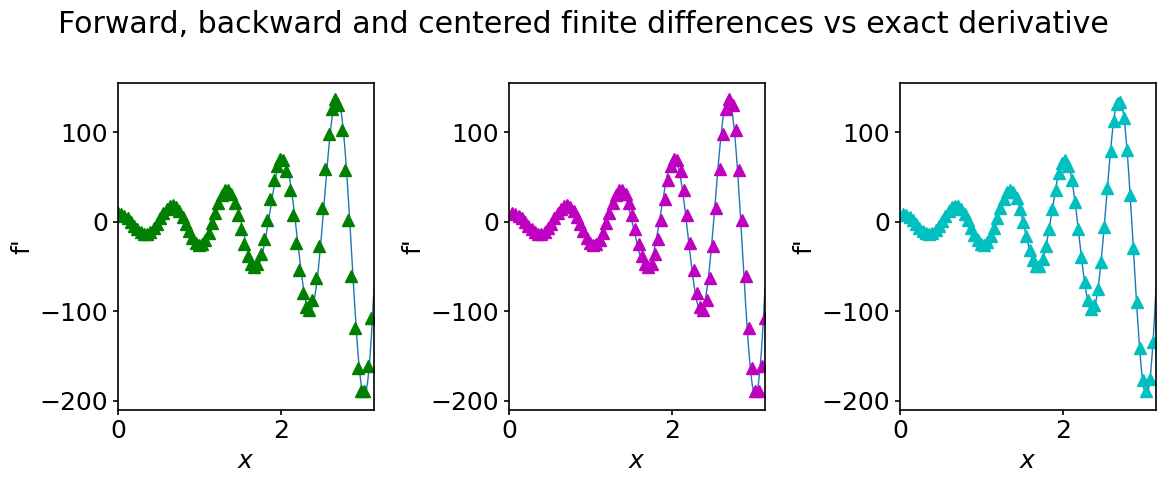

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5), tight_layout=True)

fig.suptitle('Forward, backward and centered finite differences vs exact derivative')

for axis in ax:
    axis.set_xlim(x[0], x[-1])
    
    axis.set_xlabel('$x$')
    axis.set_ylabel("f'")

ax[0].plot(x, dfdx)
ax[0].plot(x_c[0:nx-1], df_forward[0: nx-1], '^g')

ax[1].plot(x, dfdx)
ax[1].plot(x_c[1:nx], df_backward[1: nx], '^m')

ax[2].plot(x, dfdx)
ax[2].plot(x_c[1:nx-1], df_centered[1: nx-1], '^c');

What do you think about the agreement? What happens when you increase the number of points in the coarse grid?

In the above cell, we have used the slicing of numpy arrays to extract the relevant entries from our arrays. For example, for the forward finite difference, the expression is not defined at the last grid point. Therefore, the relevant grid coordinates are not the complete `x_c` array but the *slice* `x_c[0:nx-1]`. For the centered finite differences we must exclude the first and last grid points. The appropriate coordinate array slice is then `x_c[1:nx-1]`. The notions of slicing of Python sequences are described in much more detail in the next section.

## Python slicing

### Motivation and syntax

We already mentioned a powerful tool of Python: negative indexing. When the programmer tries to access elements of the sequence by referring to a negative index, the enumeration of the elements starts from the tail of the sequence. Let's say we have a Python list,

In [7]:
a = [
    'first',
    'second',
    'third'
]

and we want to iterate through its elements starting from `a[2]` to `a[0]`. It is a valid and even preferrable approach to do it using the negative indexing:

In [8]:
for i in range(-1, -4, -1):
    print(f"index: {i}, value: {a[i]}.")

index: -1, value: third.
index: -2, value: second.
index: -3, value: first.


Now that we are fully equipped in terms of knowledge about Python indexing, let's proceed to the Python slicing. Python slicing provides simple access to subsequences in Python sequences and spares programmers the necessity to loop explicitly, as we would do in C++, for example. Moreover, Python slicing [is implemented in C and precompiled][30], so, it's considerably faster than the corresponding code implemented with a Python loop.

The syntax for Python slicing is the following `sequence[i:j:k]`. `i` and `j` are respectively the start and the stop indices, while `k` is the step. Therefore, the slice is built from the sequence elements with indices: $i, i+k, i+2k, \dots, i+nk < j$. **Always remember that `sequence[i]` is included in the slice while `sequence[j]` is not.**

Below, we will use the notation `sequence[start:stop:step]` to be explicit about the meaning of the indices.

Consider the following demo. First, we create large Python list.

[30]: <https://github.com/python/cpython/blob/master/Objects/sliceobject.c> "Slicing source"

In [9]:
large_sequence = [i for i in range(10**5)]

Suppose we want to extract the sublist with the first element equal to `large_sequence[5]` and the last element equal to `large_sequence[99994]`. We could just create an empty list and fill it in a loop.

In [10]:
%%timeit

i_was_filled_in_a_loop = []

for i in range(5, 99995): # i ranges from 5 to 99994
    i_was_filled_in_a_loop.append(large_sequence[i])

7.4 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


But the more efficient way is to apply Python slicing:

In [11]:
%timeit slice_of_it = large_sequence[5:99995]

238 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


or as,

In [12]:
%timeit slice_of_it = large_sequence[5:-5]

243 µs ± 6.57 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Python slicing obviously executes faster. Try to avoid Python loops when you can slice instead.

When slicing as we did: `large_sequence[5:-5]`, we use Python slicing together with negative indexing. `5` stands for `start` and `-5` stands for `stop`. `step` is not specified, so it is set to `1` implicitly. What if we do not specify `start` or `stop`, or if we even omit *any* indexing when slicing?

In [13]:
# We now add a few elements to the a list for the
# sake of doing a demo.
#
# list.extend method differs from list.append.
# list.append adds an item as the last element
# of the list, while list.extend expects a se-
# quence as an argument and appends all its ele-
# ments to the list one by one.
#
# For more info:
# https://docs.python.org/3/tutorial/datastructures.html
a.extend(['fourth', 'fifth', 'sixth'])
print(a)

['first', 'second', 'third', 'fourth', 'fifth', 'sixth']


* Slicing when `start` is omitted

In [14]:
# We pass few arguments to the print function.
# When they are outputted, they are separated by
# the value passed to the sep argument (its default
# value is set to ' ').
print(a[:3], a[:5], sep='\n')

['first', 'second', 'third']
['first', 'second', 'third', 'fourth', 'fifth']


The output basically tells us that when `start` is omitted it is implicitly set to `0`. Slicing a sequence with `sequence[:n]` is equivalent to *extracting subsequence of first $n$ elements*. It is important to keep in mind that the above statement concerns the case of `step > 0`. Consider the following example:

In [15]:
print(a[:-3:-1])

['sixth', 'fifth']


Obviously, slicing in such a way is equivalent to doing `a[5:-3:-1]` or `a[-1:-3:-1]`. More generally, `sequence[:-n:-1]` is *extracting a subsequence consisting of the last $n-1$ elements enumerated from the tail of the sequence*.

* Slicing when `stop` is omitted

In [16]:
print(a[2::2], a[5:], a[4::-1], sep='\n')

['third', 'fifth']
['sixth']
['fifth', 'fourth', 'third', 'second', 'first']


If `stop` is omitted, `sequence[n::step]` for `step > 0` extracts the relevant elements from index n up to (and including) the last element of the sequence. If the `step < 0`, `sequence[n::step]` extracts the relevant elements from index n down to (and including) the first element of the sequence.

* Slicing when `start` and `stop` are omitted

In [17]:
print(a[:], a[::2], a[::-1], sep='\n')

['first', 'second', 'third', 'fourth', 'fifth', 'sixth']
['first', 'third', 'fifth']
['sixth', 'fifth', 'fourth', 'third', 'second', 'first']


Let's summarize our little tests by the exact citations taken from [documentation][31]:

Consider the slice sequence `s` taken as follows: `s[i:j:k]`, then

> If *i* or *j* are omitted or `None`, they become “end” values (which end depends on the sign of *k*). Note, *k* cannot be zero. If *k* is `None`, it is treated like `1`.

That is pretty much what we've observed so far. We would comment on that `k` cannot be zero. This limitation implies that the implementation of this case raises an [exception][32] of type `ValueError`. By default occurrences of uncaught exceptions terminate code execution. We won't get into the details of the treatment of exceptions, but you can read about it on your own if you are interested.

We would also cite another important piece of documentation on sequences slicing:

> If *i* or *j* is greater than `len(s)`, use `len(s)`.

What is so curious about it exactly? Consider the following examples:

[31]: <https://docs.python.org/dev/library/stdtypes.html#sequence-types-list-tuple-range> "Docs on Slicing sequences"
[32]: <https://docs.python.org/3/tutorial/errors.html> "Errors and Exceptions"

In [18]:
print(a[:1000], a[350::-1], sep='\n')

['first', 'second', 'third', 'fourth', 'fifth', 'sixth']
['sixth', 'fifth', 'fourth', 'third', 'second', 'first']


Do you see the point now? **Index overflow does not raise exception in Python slicing**.

And another important property of slicing:

> If *i* is greater than or equal to *j*, the slice is empty.

Note that this particular statement concerns the case of `step > 0`. Similarly, in the case `step < 0`, if `j` is greater than or equal to `i`, the slice is empty. Consider the demo:

In [19]:
print(a[10:1:1], a[1:10:-1], a[3:3], sep='\n')

[]
[]
[]


### Referenced or copied?

The important question to ask when you create one object from another in Python, is *whether I am copying or referencing it?* In other words, *does my old object get modified when I modify the new one?*

This question is deeply rooted in the meaning of the `=` symbol in Python. In Python, the symbol `=` is used to *assign* the value on its right-hand side to the variable on the left-hand side.

When you write this very simple statement,

```python
a=1
```

Python does two things:

* it creates an integer objects in memory containing the value 1
* it attaches (assigns) the name `a` to this location in memory

You have to remember that `a` is just a shortcut or name for the object containing the integer $1$. For numbers, this does not create much confusion. Consider for example the following lines of code:

In [20]:
a = 1
b = a
print(f'Initial value of b: {b}')
b = 2
print(f'Value of b after re-assignment: {b}')
print(f'Value of a after re-assignment: {a}')

Initial value of b: 1
Value of b after re-assignment: 2
Value of a after re-assignment: 1


Things behave quite intuitively. For lists or arrays, one needs to pay special attention. Consider another example:

In [21]:
a = [0, 1, 2, 3]
b = a
print(f'Initial value of b: {b}')
b[0] = 5
print(f'Value of b after re-assignment: {b}')
print(f'Value of a after re-assignment: {a}')

Initial value of b: [0, 1, 2, 3]
Value of b after re-assignment: [5, 1, 2, 3]
Value of a after re-assignment: [5, 1, 2, 3]


Do you notice something intriguing? The content of the list `a` has been modified by the statement `b[0]=5`. Let's discuss why this is so.

The first line of code creates 4 integer objects and a list object. It gives the name `a` to this list. `a[0], a[1], a[2], a[3]` are just shortcuts for the integer objects storing the values `0, 1, 2, 3`.

In the second line of code, we give another name to the list; we tell the code that `a` and `b` are two different names pointing to the same list. `b[0], b[1], b[2], b[3]` are then names pointing to the same integer objects as `a[0], a[1], a[2], a[3]`. For that reason, the initial `print` statement outputs the content of the list `a`. 

The statement `b[0]=5` then creates another integer object storing the value $5$ and `b[0]` becomes a shortcut to this new object. The list `b` is obviously affected. But the system has been told that `a` and `b` are nicknames for the same list. Note that we have not re-assigned `b` to another list, we have only changed the content of the list; this is allowed as a list in Python is mutable (you can change its content). So `a[0]` now also points to the integer object storing $5$ and this explains the output produced by the last print statement.

If you really want to change the content of the list `b` without affecting `a`, you need to create a separate copy of `a` and give that copy the name `b`. This can be done as follows:

In [22]:
a = [0, 1, 2, 3]
b = a.copy()
print(f'Initial value of b: {b}')
b[0] = 5
print(f'Value of b after re-assignment: {b}')
print(f'Value of a after re-assignment: {a}')

Initial value of b: [0, 1, 2, 3]
Value of b after re-assignment: [5, 1, 2, 3]
Value of a after re-assignment: [0, 1, 2, 3]


Now you see that `b` has been modified while `a` is unchanged. 

The whole discussion has been done using lists but the same behavior is true for `numpy.arrays`.

When it comes to slices, this translates to:

* $n$-level-deep elements of the original sequence for $n=1$ become copied in the slice
* $n$-level-deep elements of the original sequence for $n>1$ are references in the slice

First, let's clarify what is meant by n level depth? Python sequences can have nested sequences, like in the following example:

In [23]:
i_have_nested_dict = [1, 2, 3, {'hello': 'world'}]

We say that integers $1, 2$ and $3$ are one-level-deep in the sequence, keys and values of the nested [dictionary][33] `{'hello': 'world'}` are then two-level-deep. Let's first consider examples when there are no nested sequences in the outer sequence:

[33]: <https://docs.python.org/3/tutorial/datastructures.html#dictionaries> "Python dictionaries"

In [24]:
# First, we copy sequence a into the new variable
# to keep a itself in its original state.
original = a.copy()
b = original[:]
print('original sequence:', original, '\nslice:', b)

original[0] = 999
print('\noriginal sequence:', original, '\nslice:', b)

b[1] = False
print('\noriginal sequence:', original, '\nslice:', b)

original sequence: [0, 1, 2, 3] 
slice: [0, 1, 2, 3]

original sequence: [999, 1, 2, 3] 
slice: [0, 1, 2, 3]

original sequence: [999, 1, 2, 3] 
slice: [0, False, 2, 3]


You can see that neither modifications made to the original sequence affect the slice, nor the modifications made to the slice affect the original sequence.

But what if there were a nested sequence?

In [25]:
i_am_slice = i_have_nested_dict[:]
print('\noriginal sequence:', i_have_nested_dict, '\nslice:', i_am_slice)

i_am_slice[3]['bye'] = 'world'
print('\noriginal sequence:', i_have_nested_dict, '\nslice:', i_am_slice)

i_am_slice[0] = 9999999
print('\noriginal sequence:', i_have_nested_dict, '\nslice:', i_am_slice)


original sequence: [1, 2, 3, {'hello': 'world'}] 
slice: [1, 2, 3, {'hello': 'world'}]

original sequence: [1, 2, 3, {'hello': 'world', 'bye': 'world'}] 
slice: [1, 2, 3, {'hello': 'world', 'bye': 'world'}]

original sequence: [1, 2, 3, {'hello': 'world', 'bye': 'world'}] 
slice: [9999999, 2, 3, {'hello': 'world', 'bye': 'world'}]


We observe that while we change first-level-deep elements of the slice independently of those of the original sequence (**because they have been copied into a different location in memory**), the inner sequence is **referenced - the slice just points to the location in memory where the original sequence stores it**. In the example shown, we have added a new key-value pair in the dictionary.

**Deep** and **shallow** copies are important concepts in Python. 

When you create a shallow copy, you rather copy a structure of the original sequence than its content. The elements of the original sequence that are more than one level deep, get referenced, not copied.

Deep copy copies **everything**. Any level deep elements of the original sequenced are duplicated (stored in the separate place in memory).

When you program you must always be aware with which one you are operating.

## One-sided finite differences

In section [First-order derivative](#First-order-derivative) we mentioned that the finite difference expressions provided cannot be applied at all grid points. The centered finite difference formula is not valid at both endpoints of the domain as it requires at those locations extra points not included in the domain. At the left boundary - $x_0$ - we could compute the first order derivative using the forward finite difference formula and at the right boundary - $x_n$ - we could use the backward finite difference formula. Throughout the domain we would then have:

```{math}
    \begin{cases}
	& \displaystyle f'(x_0) = \frac{f(x_{1}) - f(x_0)}{\Delta x}, \\
    & \displaystyle f'(x_i) = \frac{f(x_{i+1}) - f(x_{i-1})}{2\Delta x},\; \; 1 \leq i \leq n-1 \\
	& \displaystyle f'(x_n) = \frac{f(x_{n}) - f(x_{n-1})}{\Delta x}.
    \end{cases}
```

The inconvenience of this formulation is that it is second-order accurate for interior grid points but only first-order accurate at boundary nodes. It might not seem a big issue, but for certain problems the overall accuracy of the solution will be first order throughout the domain and not second order as we might have wished.

To improve our discretized operator, we have to find second-order accurate expressions for the boundary nodes and we can use Taylor's theorem to achieve this goal. At the left boundary node we have:

```{math}
f(x_0 + \Delta x) = f(x_0) +f'(x_0)\Delta x+\frac12 f''(x_0)\Delta x^2+O(\Delta x^3)\\
f(x_0 + 2\Delta x) = f(x_0) +2f'(x_0)\Delta x+4\frac12 f''(x_0)\Delta x^2+O(\Delta x^3)
```

If we multiply the first equation by four and then substract the second one, we get:

```{math}
4 f(x_0 + \Delta x) - f(x_0 + 2\Delta x) = 3 f(x_0) + 2f'(x_0)\Delta x + O(\Delta x^3)
```

We can then define the following second-order accurate approximation of $f'$ at $x_0$:

```{math}
f'_0 = \frac{-\frac32 f_0 + 2f_1 - \frac12 f_2}{\Delta x}
```

The stencil for this expression is represented as:

<img width="600px" src="../figures/onesideDiff1.png">

Similarly, the following expression constitutes a second-order accurate approximation of $f'$ at $x_n$,

```{math}
f'(x_n) = \frac{\frac32 f_n - 2f_{n-1} + \frac12 f_{n-2}}{\Delta x}
```

and its stencil is:

<img width="600px" src="../figures/onesideDiff1_2.png">

We can now construct a second-order discretized operator throughout the domain by using the above two expressions at the boundary nodes. Our complete computation of the second-order accurate first-order derivative then looks like (for the sake of completeness, we repeat the whole code here):

In [26]:
nx = 80          # number of grid points (coarse grid)
lx = np.pi       # length of interval
dx = lx / (nx-1) # grid spacing

In [27]:
x_c = np.linspace(0, lx, nx)          # coordinates in the coarse grid
f_c = np.exp(x_c)*np.sin(3*np.pi*x_c) # function in the coarse grid

df_2 = np.empty(nx)

# Here we take advantage of Python slicing instead
# of Python looping.
df_2[0] = (-3./2*f_c[0] + 2*f_c[1] - 1./2.*f_c[2]) / dx
df_2[-1] = (3./2*f_c[-1] - 2*f_c[-2] + 1./2.*f_c[-3]) / dx
df_2[1:-1] = (f_c[2:] - f_c[:-2]) / (2*dx)

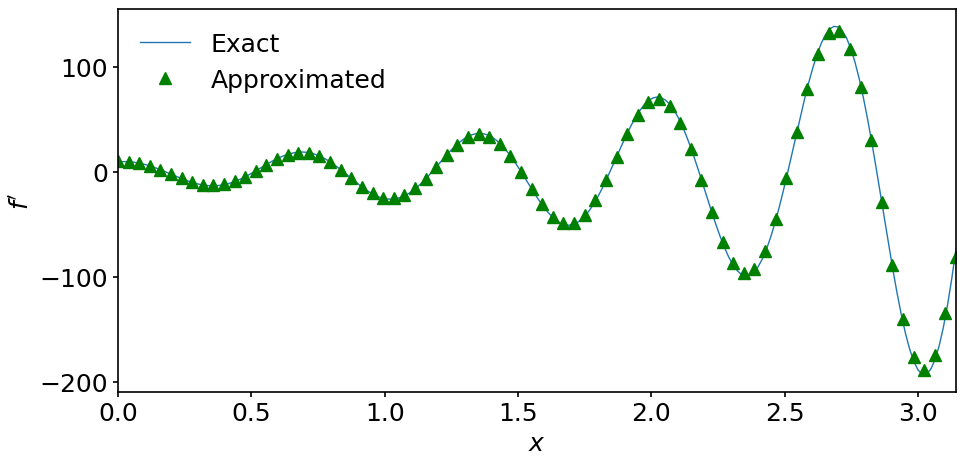

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

# We only display x-axis starting from the minimum
# of sequence (x[0], x_c[0]) to the maximum of
# sequence (x[-1], x_c[-1]).
ax.set_xlim(min(x[0], x_c[0]), max(x[-1], x_c[-1]))

ax.plot(x, dfdx, label='Exact')
ax.plot(x_c, df_2, '^g', label='Approximated')
ax.set_xlabel('$x$')
ax.set_ylabel("$f'$")

ax.legend(loc='upper left');

## Summary

In this notebook, we learned how to approximate derivatives using finite differences. We illustrated how finite-difference formulas can be derived and showed how to treat boundary nodes in the numerical grid.

Besides that, we've explained the Python slicing and motivated its usage showing its advantage over Python looping. In the next notebook we extend our knowledge on finite differences by considering higher-order derivatives.